<a href="https://colab.research.google.com/github/KinzaSyedHussain/Global-internet-patterns/blob/main/Analyzing_global_internet_patterns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

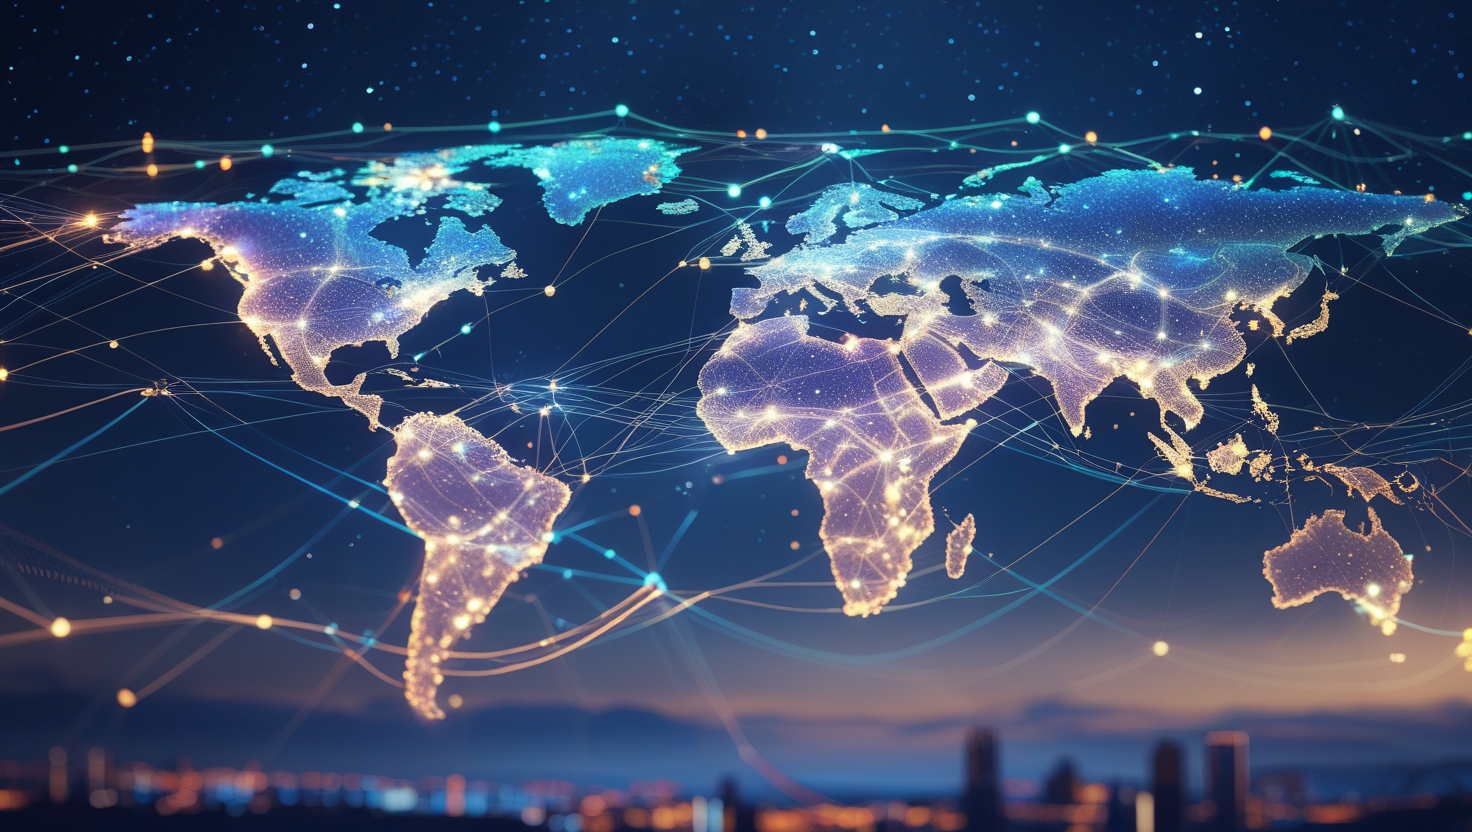


## 🧾 Executive summary
Analyzing Global Internet Patterns (2000-2023)

Our analysis of global internet usage from 2000 to 2023 reveals a steady increase in internet penetration worldwide. Developed nations achieved near-universal access by 2020, while developing regions exhibited slower but consistent growth. Key insights include significant disparities in internet access between high-income and low-income countries, with some regions still struggling with limited connectivity. The correlation matrix highlights a strong positive trend in internet adoption across years, emphasizing continuous digital expansion.

# **1. Importing Necessary Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


# **2. Loading the Data**


In [ ]:
data = pd.read_csv("data/internet_usage.csv")


# **3. Exploring the Data**

In [ ]:
data.head()

Country Name Country Code      2000  ...     2021     2022     2023
0     Afghanistan          AFG        ..  ...       ..       ..       ..
1         Albania          ALB  0.114097  ...  79.3237  82.6137  83.1356
2         Algeria          DZA  0.491706  ...  66.2356  71.2432       ..
3  American Samoa          ASM        ..  ...       ..       ..       ..
4         Andorra          AND   10.5388  ...  93.8975  94.4855       ..

[5 rows x 26 columns]

In [ ]:
data.shape

(217, 26)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country Name  217 non-null    object
 1   Country Code  217 non-null    object
 2   2000          217 non-null    object
 3   2001          217 non-null    object
 4   2002          217 non-null    object
 5   2003          217 non-null    object
 6   2004          217 non-null    object
 7   2005          217 non-null    object
 8   2006          217 non-null    object
 9   2007          217 non-null    object
 10  2008          217 non-null    object
 11  2009          217 non-null    object
 12  2010          217 non-null    object
 13  2011          217 non-null    object
 14  2012          217 non-null    object
 15  2013          217 non-null    object
 16  2014          217 non-null    object
 17  2015          217 non-null    object
 18  2016          217 non-null    object
 19  2017    

In [ ]:
data.dtypes

Country Name    object
Country Code    object
2000            object
2001            object
2002            object
2003            object
2004            object
2005            object
2006            object
2007            object
2008            object
2009            object
2010            object
2011            object
2012            object
2013            object
2014            object
2015            object
2016            object
2017            object
2018            object
2019            object
2020            object
2021            object
2022            object
2023            object
dtype: object

In [ ]:
data.shape

(217, 26)

# **4. Data Cleaning**

In [ ]:
# convert year columns to numeric, coerce errors to NaN
for year in range(2000, 2024):
    data[str(year)] = pd.to_numeric(data[str(year)], errors='coerce')

# drop rows where all year columns are NaN
data.dropna(subset=[str(year) for year in range(2000, 2024)], how='all', inplace=True)

# reset index after dropping rows
data.reset_index(drop=True, inplace=True)

# display the cleaned data
data.head()

Country Name Country Code       2000  ...     2021     2022     2023
0  Afghanistan          AFG        NaN  ...      NaN      NaN      NaN
1      Albania          ALB   0.114097  ...  79.3237  82.6137  83.1356
2      Algeria          DZA   0.491706  ...  66.2356  71.2432      NaN
3      Andorra          AND  10.538800  ...  93.8975  94.4855      NaN
4       Angola          AGO   0.105046  ...  37.8067  39.2935      NaN

[5 rows x 26 columns]

# **5. Data Analysis**

In [ ]:
# summary statistics
summary_stats = data.describe()


In [ ]:

# correlation matrix
# select only numeric columns for correlation matrix
numeric_data = data.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()



In [ ]:
# checking for any remaining missing values
missing_values = data.isnull().sum()



In [ ]:
# displaying the results
summary_stats, correlation_matrix, missing_values

(             2000        2001        2002  ...        2021        2022        2023
 count  196.000000  199.000000  202.000000  ...  190.000000  183.000000   59.000000
 mean     8.732304   10.653857   13.617630  ...   67.880720   71.291703   87.666746
 std     13.321323   15.479203   18.354699  ...   25.496128   24.284565   12.983169
 min      0.000000    0.000000    0.000000  ...    9.642410   11.275000   18.000000
 25%      0.380223    0.455810    1.058300  ...   49.958850   56.861350   85.068600
 50%      2.322545    2.987160    4.768315  ...   75.651350   79.126900   89.535200
 75%      9.515232   13.886900   19.248925  ...   87.390025   89.693700   94.939000
 max     52.000000   64.000000   79.120000  ...  100.000000  100.000000  100.000000
 
 [8 rows x 24 columns],
           2000      2001      2002  ...      2021      2022      2023
 2000  1.000000  0.989460  0.961147  ...  0.544868  0.529450  0.453685
 2001  0.989460  1.000000  0.971909  ...  0.572978  0.554384  0.474170
 2002

# **6. Data Visualization**

## **Top 10 Countries by Value in 2023**

In [ ]:
# plot pie chart for Top 10 Countries by Value in 2023
fig = px.pie(data, names='Country Name', values='2023', title='Top 10 Countries by Value in 2023')
fig.show()

The pie chart highlights the top 10 countries with the highest internet usage in 2023, with percentages ranging from 9.8% to 10.1%. Nations like Korea, Switzerland, and the UAE lead, reflecting strong infrastructure and tech adoption. This even distribution underscores saturation in highly developed regions, emphasizing the need for continued innovation.

In [ ]:
top_countries = data[['Country Name', '2023']].nlargest(10, '2023')

fig = px.bar(top_countries, x="Country Name", y="2023",
             title="Top 10 Countries by Internet Usage (2023)",
             text="2023", color="2023")
fig.show()


This bar chart represents the top 10 countries with the highest percentage of internet users in 2023. Bahrain, Saudi Arabia, and the United Arab Emirates have full internet adoption (100% of their populations are online). Kuwait (99.74%) and Luxembourg (99.34%) also show nearly universal internet access. Norway (99%) and Denmark (98.77%) are slightly lower but still very high. Malaysia (97.69%), South Korea (97.42%), and Switzerland (97.34%) show slightly lower percentages but are still among the top-ranked nations.

## **Internet Usage Over Time**

In [ ]:
# prepare data for Plotly
plotly_data = data.melt(id_vars=['Country Name', 'Country Code'], var_name='Year', value_name='Internet Usage (%)')

# create the Plotly line chart
fig = px.line(plotly_data, x='Year', y='Internet Usage (%)', color='Country Name',
              title='Internet Usage Over Time by Country')

# update layout for better readability
fig.update_layout(xaxis_title='Year', yaxis_title='Internet Usage (%)',
                  legend_title_text='Country', xaxis_tickangle=-45)

# show the plot
fig.show()

The line chart shows the percentage of internet usage over time (2000–2023) for various countries. It reflects a general trend of increasing internet adoption globally, with some nations achieving over 90% penetration by 2023. However, the data reveals disparities in growth rates, indicating differing levels of infrastructure and accessibility across regions.



In [ ]:
import plotly.express as px
import pandas as pd

# load data from CSV file
data_long = pd.read_csv("data/internet_usage.csv")

# reshape the data to long format
data_long = pd.melt(data_long, id_vars=["Country Name", "Country Code"],
                    var_name="Year", value_name="Internet Usage")

# plotting the choropleth
fig = px.choropleth(data_long,
                    locations="Country Code",
                    color="Internet Usage",
                    hover_name="Country Name",
                    animation_frame="Year",
                    title="Global Internet Usage Over Time (2000-2023)",
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

The choropleth map visualizes the percentage of internet usage over time (2000–2023) for various countries. It highlights the global trend of increasing internet adoption, with some countries reaching over 90% penetration by 2023. The map also reveals significant disparities in internet usage growth rates, reflecting varying levels of infrastructure and accessibility across different regions.

## **Internet Usage Over Time for 10 Countries with Lowest Usage**

In [ ]:
# calculate the average internet usage for each country
average_usage = data.groupby('Country Name')['2023'].mean().reset_index()

# sort countries by average internet usage and select the 10 countries with the lowest usage
lowest_usage_countries = average_usage.nsmallest(10, '2023')

# filter the original data to include only the 10 countries with the lowest internet usage
filtered_data = data[data['Country Name'].isin(lowest_usage_countries['Country Name'])]

# prepare data for Plotly
plotly_data = filtered_data.melt(id_vars=['Country Name', 'Country Code'],
                                 var_name='Year', value_name='Internet Usage (%)')

# create the Plotly bar chart
fig = px.bar(plotly_data, x='Country Name', y='Internet Usage (%)', color='Year',
             title='Internet Usage Over Time for 10 Countries with Lowest Usage')

# update layout for better readability
fig.update_layout(xaxis_title='Country', yaxis_title='Internet Usage (%)',
                  legend_title_text='Year', xaxis_tickangle=-45)

# show the plot
fig.show()

 Internet usage has steadily increased across all countries, with China and Mexico having higher usage than Mozambique and Indonesia, which have consistently low rates. The growth is consistent, without sharp spikes, and countries like Bulgaria and Georgia show faster improvement than expected.

# **Conclusion: Key Insights and Future Directions**

The data analysis from 2000 to 2023 highlights significant global growth in internet usage, with a strikingly positive correlation between the years and internet adoption, showing an upward trajectory in global usage. However, a digital divide persists, as higher-income countries enjoy near-total internet access, while low-income regions still struggle with limited connectivity. Nations such as South Korea, Switzerland, and the UAE lead the way, consistently achieving close to 100% internet usage. Emerging trends are evident in Northern Europe and the Middle East, where these regions have made substantial progress in internet penetration. As some regions near saturation, the need for innovative solutions to bridge the access gaps in developing countries becomes increasingly critical.